### Clustering Music Genres (Problem Statement)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Spotify-2000.csv")


In [4]:
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [4]:
df.isnull().sum()

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df.corr(numeric_only=True)

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
Index,1.000000,-0.607910,-0.048918,-0.114307,-0.047156,-0.260179,-0.027125,0.063304,0.057346,-0.050991,0.087442
Year,-0.607910,1.000000,0.012570,0.147235,0.077493,0.343764,0.019017,-0.166163,-0.132946,0.054097,-0.158962
Beats Per Minute (BPM),-0.048918,0.012570,1.000000,0.156644,-0.140602,0.092927,0.016256,0.059653,-0.122472,0.085598,-0.003181
Energy,-0.114307,0.147235,0.156644,1.000000,0.139616,0.735711,0.174118,0.405175,-0.665156,0.205865,0.103393
Danceability,-0.047156,0.077493,-0.140602,0.139616,1.000000,0.044235,-0.103063,0.514564,-0.135769,0.125229,0.144344
Loudness (dB),-0.260179,0.343764,0.092927,0.735711,0.044235,1.000000,0.098257,0.147041,-0.451635,0.125090,0.165527
Liveness,-0.027125,0.019017,0.016256,0.174118,-0.103063,0.098257,1.000000,0.050667,-0.046206,0.092594,-0.111978
Valence,0.063304,-0.166163,0.059653,0.405175,0.514564,0.147041,0.050667,1.000000,-0.239729,0.107102,0.095911
Acousticness,0.057346,-0.132946,-0.122472,-0.665156,-0.135769,-0.451635,-0.046206,-0.239729,1.000000,-0.098256,-0.087604
Speechiness,-0.050991,0.054097,0.085598,0.205865,0.125229,0.125090,0.092594,0.107102,-0.098256,1.000000,0.111689


<Axes: >

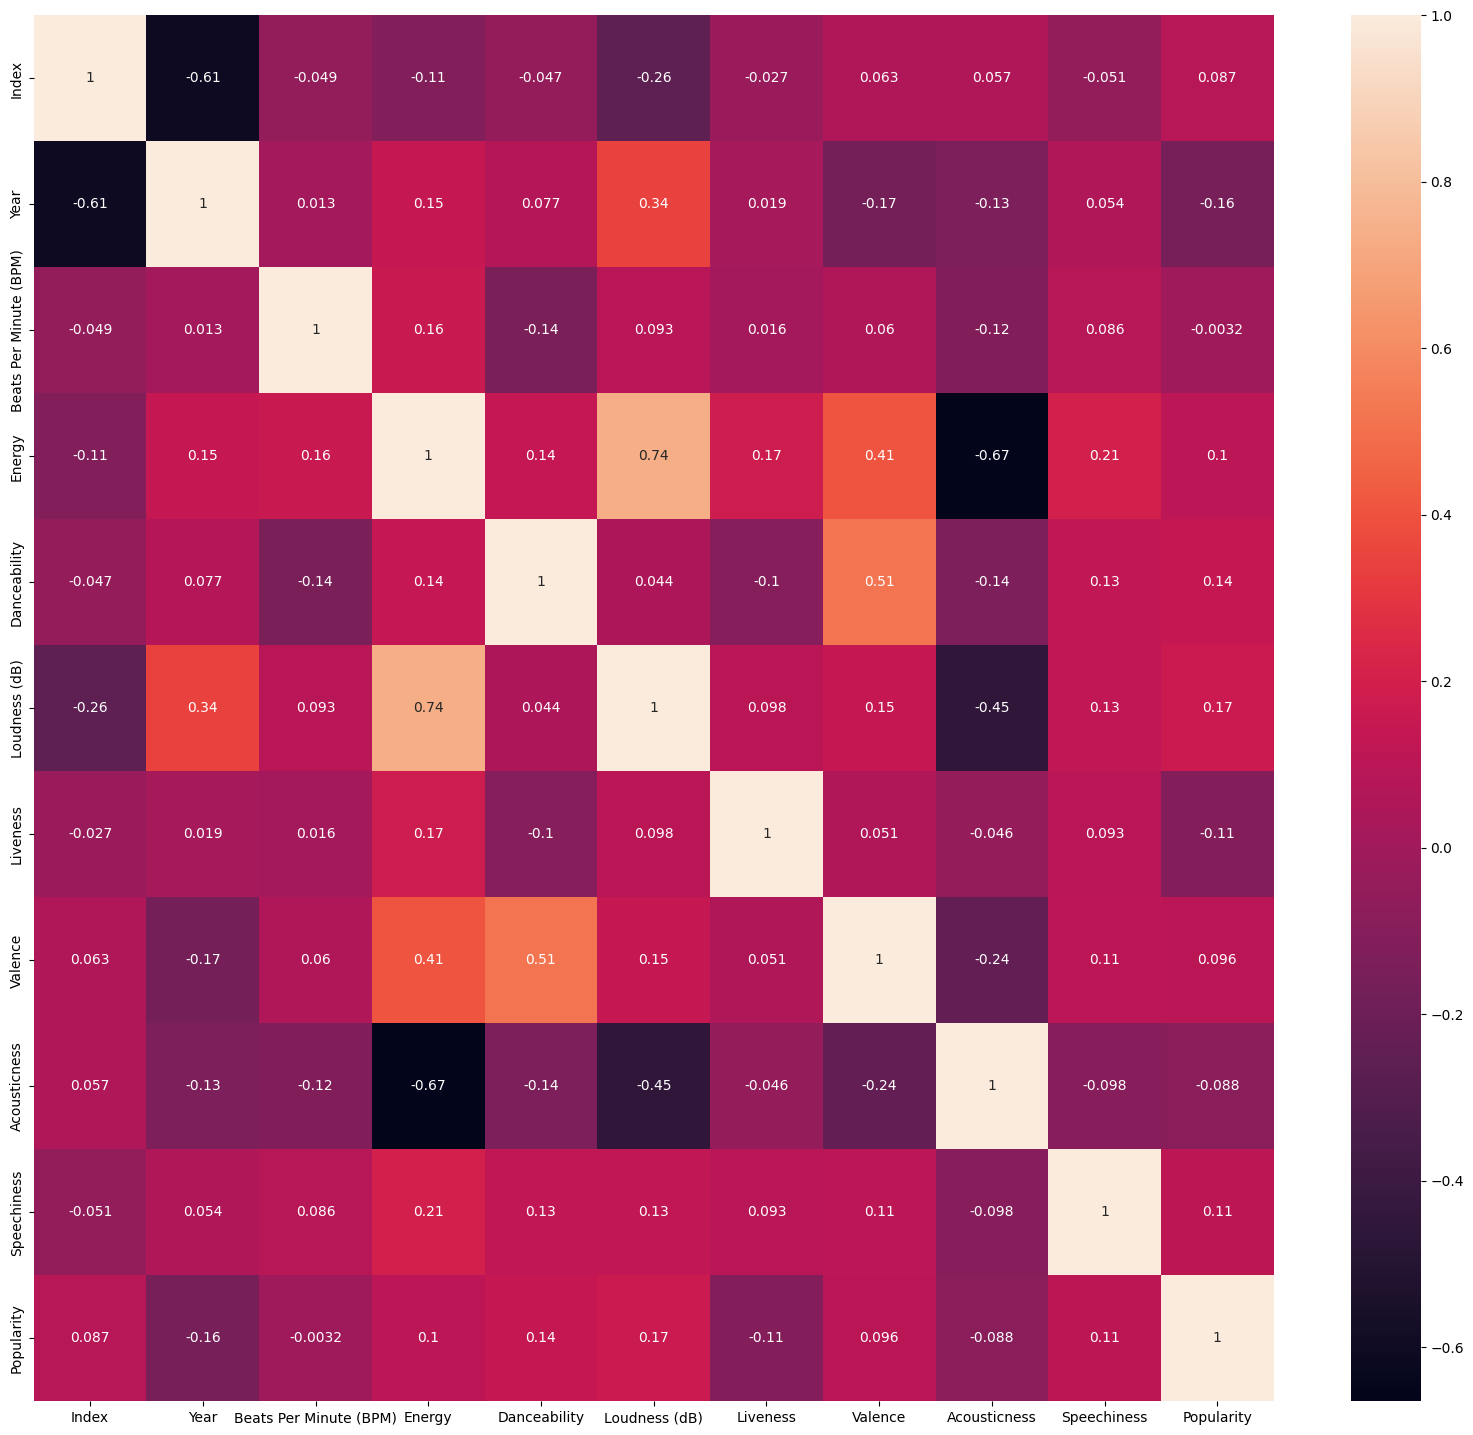

In [8]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [9]:
df["Top Genre"].value_counts()

Top Genre
album rock           413
adult standards      123
dutch pop             88
alternative rock      86
dance pop             83
                    ... 
streektaal             1
indie anthem-folk      1
la pop                 1
ccm                    1
bebop                  1
Name: count, Length: 149, dtype: int64

In [18]:
data=df[["Beats Per Minute (BPM)","Energy","Loudness (dB)","Liveness","Valence","Acousticness","Speechiness",]]

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()

In [21]:
#data=scaler.fit_transform(data)

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [23]:
kmeans = KMeans(n_clusters=10)


In [24]:
clusters = kmeans.fit_predict(data)

In [25]:
data["cluster"] = clusters

C:\Users\Evim Preschool\AppData\Local\Temp\ipykernel_12880\403900604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["cluster"] = clusters


In [26]:
#data['cluster']=data['cluster'].map({0:'Cluster 1',1:'Cluster 2',2:'Cluster 3',3:'Cluster 4',4:'Cluster 5',5:'Cluster 6',6:'Cluster 7',7:'Cluster 8',8:'Cluster 9',9:'Cluster 10'})

In [27]:
data.head()

,Beats Per Minute (BPM),Energy,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,cluster
0,157,30,-14,11,68,94,3,9
1,135,79,-11,17,81,17,7,7
2,168,69,-9,7,52,2,17,0
3,173,96,-4,3,37,0,4,0
4,106,82,-5,10,87,1,3,1


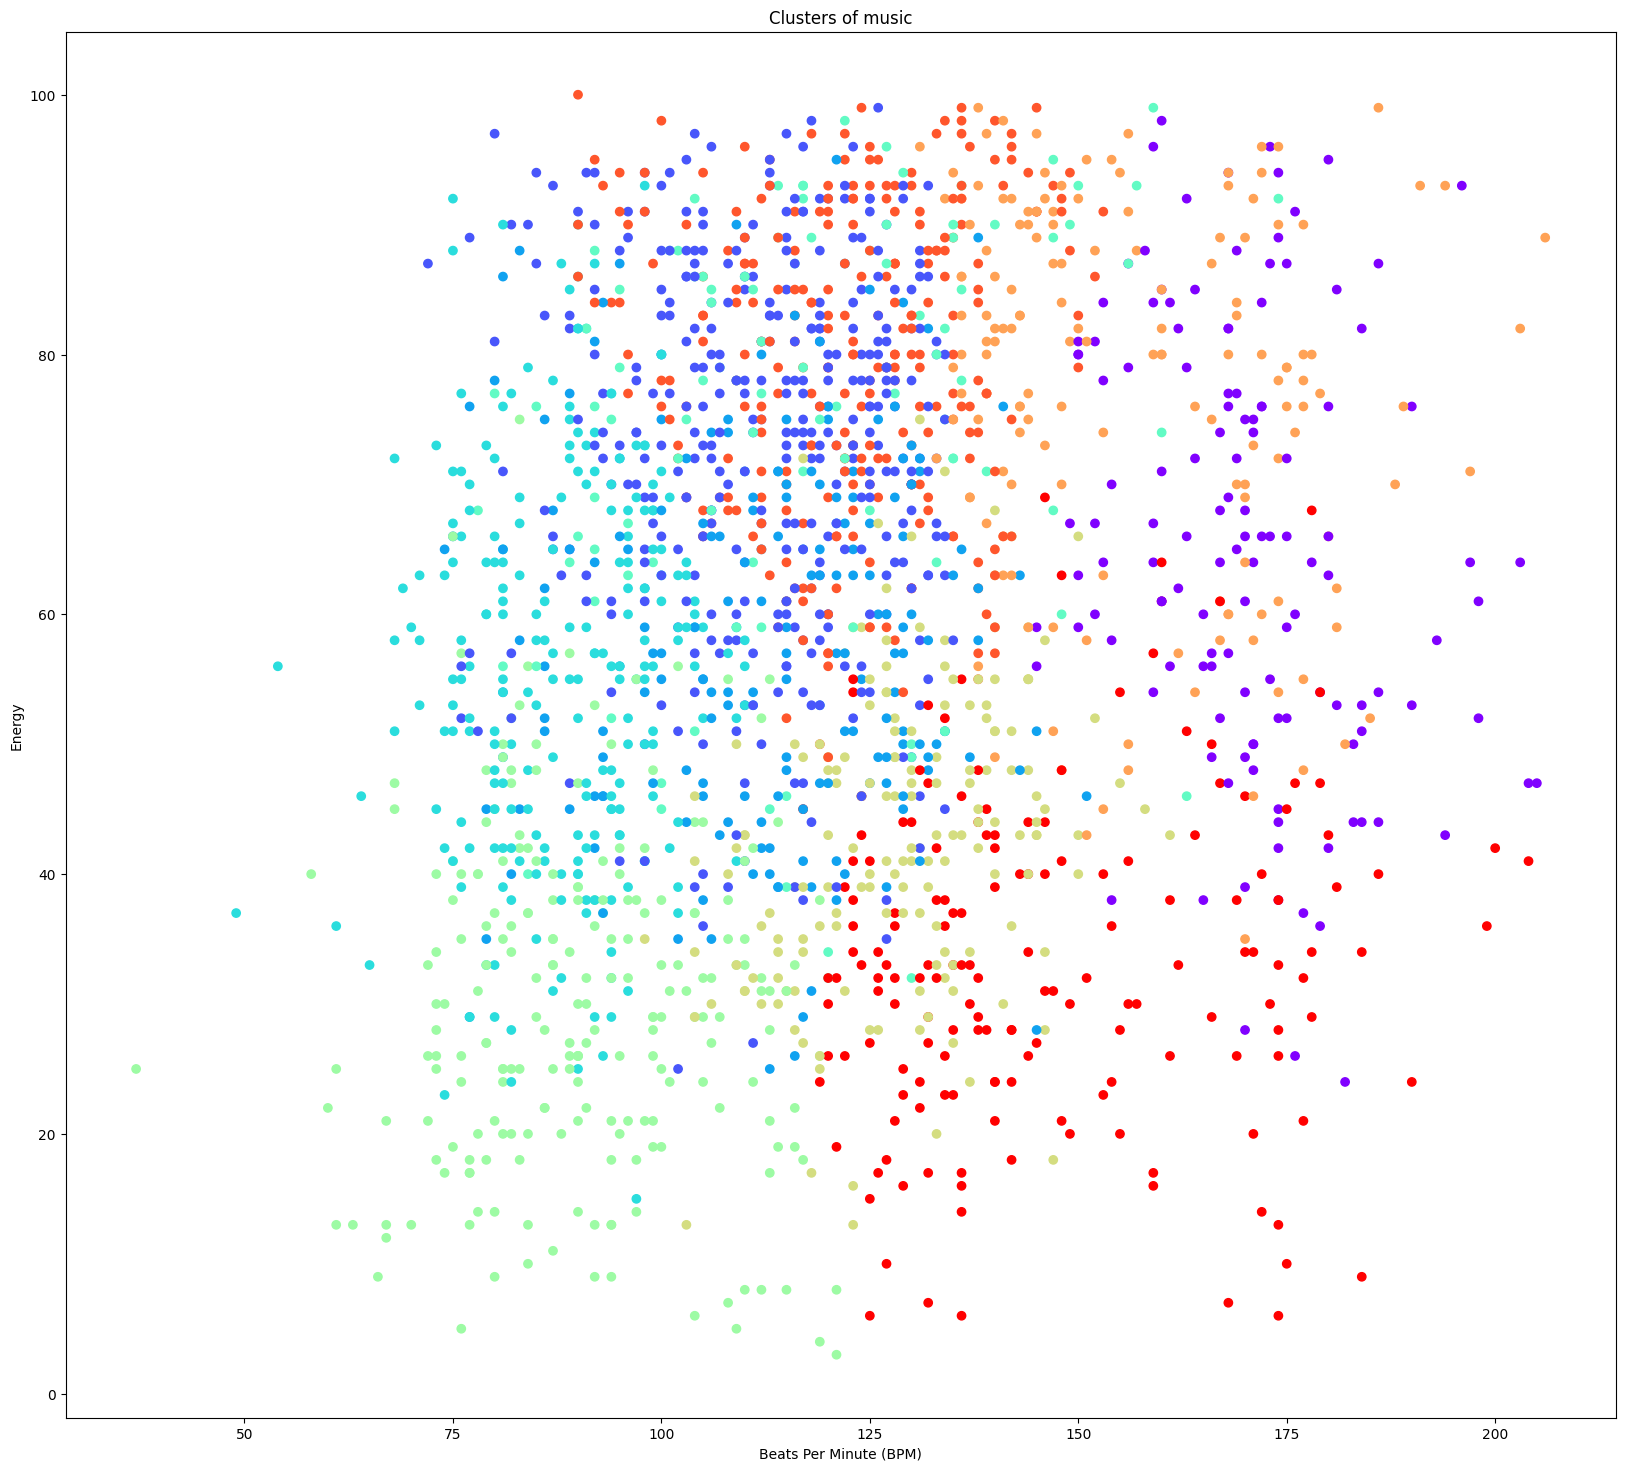

In [28]:
plt.figure(figsize=(20,18))
plt.scatter(data['Beats Per Minute (BPM)'],data['Energy'],c=data['cluster'],cmap='rainbow')
plt.title('Clusters of music')
plt.xlabel('Beats Per Minute (BPM)')
plt.ylabel('Energy')
plt.show()

In [29]:
#save model
import pickle
pickle.dump(kmeans,open('music_cluster.h5','wb'))